# Homework 04
Please complete the cells marked with "TODO" from T1 to T9.

**Please be sure to not re-assign variables throughout the notebook!** For example, if you use `max_temperature` in your answer to one question, do not reassign it later on.

In [ ]:
# Do not modify this cell
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import seaborn as sns
def percentile(data, p):
  return np.percentile(data, p, method='inverted_cdf')

## Thai Restaurants

Oswaldo and Varun are trying to see what the best Thai restaurant in PNU is. They survey 1,500 students selected uniformly at random and ask each student what Thai restaurant is the best. The choices of Thai restaurants are Lucky House, Imm Thai, Thai Temple, and Thai Basil. After compiling the results, Oswaldo and Varun release the following percentages from their sample:

|Thai Restaurant  | Percentage|
|:------------:|:------------:|
|Lucky House | 8% |
|Imm Thai | 53% |
|Thai Temple | 25% |
|Thai Basil | 14% |

These percentages represent a uniform random sample of the population of the PNU students. We will attempt to estimate the corresponding *parameters*, or the percentage of the votes that each restaurant will receive from the population (i.e. all PNU students). We will use confidence intervals to compute a range of values that reflects the uncertainty of our estimates.

The table (i.e., DataFrame) `votes` contains the results of Oswaldo and Varun's survey.

In [ ]:
path_data = "https://raw.githubusercontent.com/mlee-pnu/IDS/main/data/"
votes = pd.read_csv(path_data + 'votes.csv')
votes

,Vote
0,Lucky House
1,Lucky House
2,Lucky House
3,Lucky House
4,Lucky House
...,...
1495,Thai Basil
1496,Thai Basil
1497,Thai Basil
1498,Thai Basil


## T1
Complete the function `one_resampled_percentage` below. It should return Imm Thai's ***percentage*** of votes after taking the original table and performing one bootstrap sample of it. Reminder that a percentage is between 0 and 100.

*Note:* `df` will always be in the same format as `votes`.

*Hint:* Given a table of votes, how can you figure out what percentage of the votes are for a certain restaurant? **Be sure to use percentages, not proportions, for this question!**

In [ ]:
def one_resampled_percentage(df):
    bootstrap_sample = df.sample(len(df), replace=True)
    percent = len(bootstrap_sample[bootstrap_sample['Vote'] == "Imm Thai"]) / len(bootstrap_sample)
    percent = np.round(percent*100, 2)
    return percent

one_resampled_percentage(votes)

54.13

## T2
Complete the `percentages_in_resamples` function such that it simulates and returns an array of 2022 elements, where each element represents a bootstrapped estimate of the percentage of voters who will vote for Imm Thai. You should use the `one_resampled_percentage` function you wrote above.

In [ ]:
def percentages_in_resamples():
    percentage_imm = np.array([])
    for i in np.arange(2022):
      percent_resample = one_resampled_percentage(votes)
      percentage_imm = np.append(percentage_imm, percent_resample)
    return percentage_imm

In the following cell, we run the function you just defined, `percentages_in_resamples`, and create a histogram of the calculated statistic for the 2022 bootstrap estimates of the percentage of voters who voted for Imm Thai.

*Note:* This might take a few seconds to run.

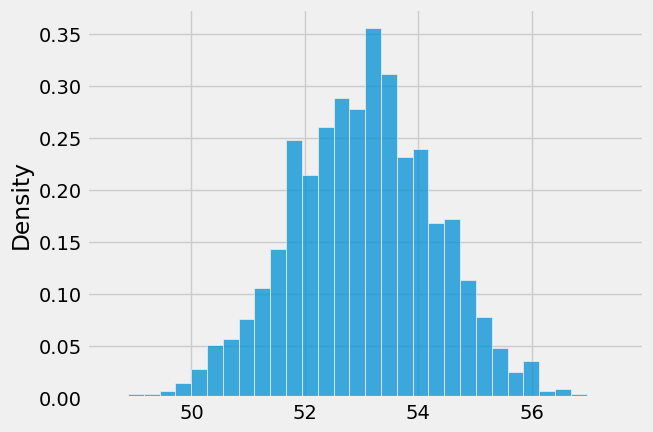

In [ ]:
resampled_percentages = percentages_in_resamples()
sns.histplot(resampled_percentages, stat='density')
plots.show()

## T3
Using the array `resampled_percentages`, find the values at the two edges of the middle 95% of the bootstrapped percentage estimates. Compute the lower and upper ends of the interval, named `imm_lower_bound` and `imm_upper_bound` respectively.

*Hint:* If you are stuck on this question, try looking over [Chapter 13](https://inferentialthinking.com/chapters/13/Estimation.html) of the textbook.

In [ ]:
imm_lower_bound = percentile(resampled_percentages, 2.5)
imm_upper_bound = percentile(resampled_percentages, 97.5)
print(f"Bootstrapped 95% confidence interval for the percentage of Imm Thai voters in the population: [{imm_lower_bound:.2f}, {imm_upper_bound:.2f}]")

Bootstrapped 95% confidence interval for the percentage of Imm Thai voters in the population: [50.47, 55.53]


## T4
The survey results seem to indicate that Imm Thai is beating all the other Thai restaurants among the voters. We would like to use confidence intervals to determine a range of likely values for Imm Thai's true lead over all the other restaurants combined. The calculation for Imm Thai's lead over Lucky House, Thai Temple, and Thai Basil combined is:

$$\text{Imm Thai's percent of the vote} - (\text{100 percent} - \text{Imm Thai's percent of vote})$$

Define the function `one_resampled_difference` that returns **exactly one value** of Imm Thai's percentage lead over Lucky House, Thai Temple, and Thai Basil combined from one bootstrap sample of `df`.

*Hint 1:* Imm Thai's lead can be negative.

*Hint 2:* Given a table of votes, how can you figure out what percentage of the votes are for a certain restaurant? **Be sure to use percentages, not proportions, for this question!**

*Note:* If the skeleton code provided within the function is not helpful for you, feel free to approach the question using your own variables.

In [ ]:
def one_resampled_difference(df):
    bootstrap_sample = df.sample(len(df), replace=True)
    percent_imm = len(bootstrap_sample[bootstrap_sample['Vote'] == "Imm Thai"]) / len(bootstrap_sample)
    percent_imm = np.round(percent_imm*100, 2)
    lead = np.round(percent_imm - (100 - percent_imm), 2)
    return lead

In [ ]:
one_resampled_difference(votes)

6.4

## T5
Write a function called `leads_in_resamples` that returns an array of 2022 elements representing the bootstrapped estimates (the result of calling `one_resampled_difference`) of Imm Thai's lead over Lucky House, Thai Temple, and Thai Basil combined. Afterwards, run the cell to plot a histogram of the resulting samples.

*Hint:* If you see an error involving `NoneType`, consider what components a function needs to have!

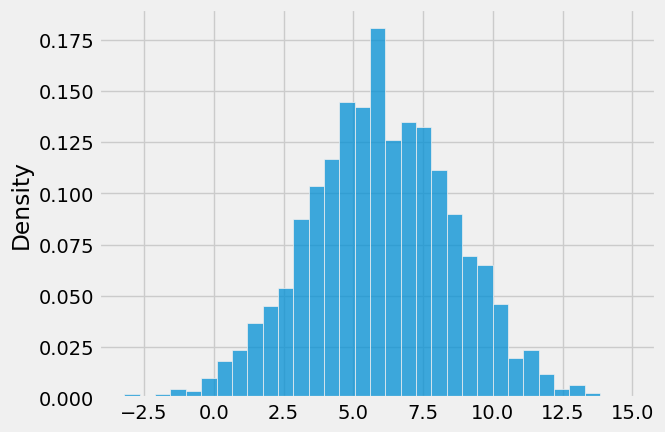

In [ ]:
def leads_in_resamples():
    leads_imm = np.array([])
    for i in np.arange(2022):
      lead_resample = one_resampled_difference(votes)
      leads_imm = np.append(leads_imm, lead_resample)
    return leads_imm

sampled_leads = leads_in_resamples()
sns.histplot(sampled_leads, stat='density')
plots.show()

## T6
Use the simulated data in `sampled_leads` from T5 to compute an approximate 95% confidence interval for Imm Thai's true lead over Lucky House, Thai Temple, and Thai Basil combined.

In [ ]:
diff_lower_bound = percentile(sampled_leads, 2.5)
diff_upper_bound = percentile(sampled_leads, 97.5)
print("Bootstrapped 95% confidence interval for Imm Thai's true lead over Lucky House, Thai Temple, and Thai Basil combined: [{:f}%, {:f}%]".format(diff_lower_bound, diff_upper_bound))

Bootstrapped 95% confidence interval for Imm Thai's true lead over Lucky House, Thai Temple, and Thai Basil combined: [0.660000%, 11.340000%]


## Interpreting Confidence Intervals

The staff computed the following 95% confidence interval for the percentage of Imm Thai voters:

$$[50.53, 55.53]$$

(Your answer may have been a bit different due to randomness; that doesn't mean it was wrong!)

## T7
The staff also created 70%, 90%, and 99% confidence intervals from the same sample, but we forgot to label which confidence interval represented which percentages! **First**, match each confidence level (70%, 90%, 99%) with its corresponding interval in the cell below (e.g. __ % CI: [52.1, 54] $\rightarrow$ replace the blank with one of the three confidence levels).
The intervals are below:

* 99% CI: [50.03, 55.94]
* 70% CI: [52.1, 54]
* 90% CI: [50.97, 54.99]


## T8
Suppose we produced 6,000 new samples (each one a new/distinct uniform random sample of 1,500 students) from the population and created a 95% confidence interval from each one. Roughly how many of those 6,000 intervals do you expect will actually contain the true percentage of the population?

Assign your answer to `true_percentage_intervals`.


In [ ]:
true_percentage_intervals = 5700
true_percentage_intervals

5700

Recall the second bootstrap confidence interval you created, which estimated Imm Thai's lead over Lucky House, Thai Temple, and Thai Basil combined. Among
voters in the sample, Imm Thai's lead was 6%. The staff's 95% confidence interval for the true lead (in the population of all voters) was:

$$[1.2, 11.2]$$

Suppose we are interested in testing a simple yes-or-no question:

> "Is the percentage of votes for Imm Thai equal to the percentage of votes for Lucky House, Thai Temple, and Thai Basil combined?"

Our null hypothesis is that the percentages are equal, or equivalently, that Imm Thai's lead is exactly 0. Our alternative hypothesis is that Imm Thai's lead is not equal to 0.  In the questions below, don't compute any confidence interval yourself—use only the staff's 95% confidence interval.

## T9
Say we use a 5% p-value cutoff. Do we reject the null, fail to reject the null, or are we unable to tell using the staff's confidence interval?

Assign `cutoff_five_percent` to the number corresponding to the correct answer.

1. Reject the null / Data is consistent with the alternative hypothesis
2. Fail to reject the null / Data is consistent with the null hypothesis
3. Unable to tell using our staff confidence interval

*Hint:* Consider the relationship between the p-value cutoff and confidence. If you're confused, take a look at [this chapter](https://inferentialthinking.com/chapters/13/4/Using_Confidence_Intervals.html) of the textbook.

In [ ]:
cutoff_five_percent = 1
cutoff_five_percent